# Install and Functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [ ]:
def read_output_files(folder_path):
    dfs = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'rb') as file:
                df = pickle.load(file)
                dfs.append(df)
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        print("No pickle files found in the folder.")
        return None
out_path = 'Output'

# Regression

## Regression optfl='N'

In [ ]:
ds_model = read_output_files(out_path)
ds_model_srt = ds_model.sort_values(by='PercentRemoved')
ds_model_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.773776,0.00
1,2,0.769850,0.07
2,2,0.770518,0.14
3,2,0.770060,0.21
4,2,0.767169,0.28
...,...,...,...
1296,2,0.764904,90.72
1297,2,0.764172,90.79
1298,2,0.776256,90.86
1299,2,0.774453,90.93


In [ ]:
hg_acc_rg = ds_model_srt['Accuracy'].max()
lw_acc_rg = ds_model_srt['Accuracy'].min()
base_acc_rg = ds_model_srt['Accuracy'].iloc[0]


acc_hl_rg = hg_acc_rg - lw_acc_rg
acc_hb_rg = hg_acc_rg - base_acc_rg
acc_lb_rg = lw_acc_rg - base_acc_rg

print("Difference between highest and lowest accuracy:", acc_hl_rg)
print("Difference between highest and base accuracy:", acc_hb_rg)
print("Difference between lowest and base accuracy:", acc_lb_rg)

rgkeyval = {
    'high_acc': [hg_acc_rg],
    'low_acc': [lw_acc_rg],
    'base_acc': [base_acc_rg],
    'diff_high_low': [acc_hl_rg],
    'diff_high_base': [acc_hb_rg],
    'diff_low_base': [acc_lb_rg]
}

dataf = pd.DataFrame(rgkeyval)
dataf

Difference between highest and lowest accuracy: 0.05497122305937319
Difference between highest and base accuracy: 0.03830456864884113
Difference between lowest and base accuracy: -0.016666654410532056


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.812081,0.757109,0.773776,0.054971,0.038305,-0.016667


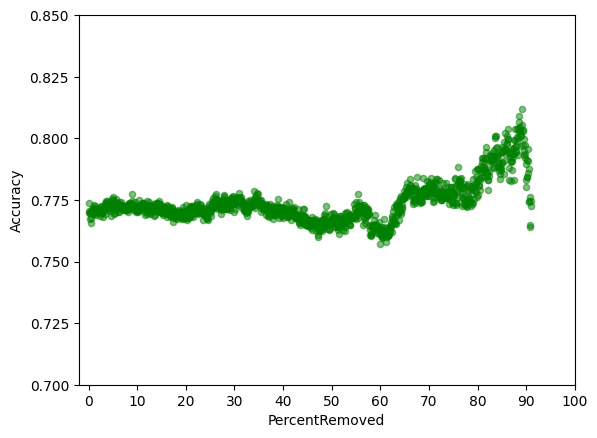

In [ ]:
ds_model_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()

## Regression optfl='Y'

In [ ]:
ds_model1 = read_output_files(out_path)
ds_model_srt1 = ds_model1.sort_values(by='PercentRemoved')
ds_model_srt1

,model__C,model__class_weight,model__penalty,model__solver,Accuracy,PercentRemoved
602,0.016379,balanced,l1,liblinear,0.773776,0.00
603,0.026827,balanced,l1,liblinear,0.769432,0.07
604,0.016379,None,l1,liblinear,0.770727,0.14
605,0.010000,balanced,l1,liblinear,0.771001,0.21
606,0.026827,balanced,l2,liblinear,0.766541,0.28
...,...,...,...,...,...,...
1165,0.117877,None,l1,liblinear,0.755906,90.72
1166,0.043940,balanced,l1,liblinear,0.750567,90.79
1167,0.026827,balanced,l1,liblinear,0.752283,90.86
1168,0.043940,balanced,l2,saga,0.760644,90.93


In [ ]:
hg_acc_rg = ds_model_srt1['Accuracy'].max()
lw_acc_rg = ds_model_srt1['Accuracy'].min()
base_acc_rg = ds_model_srt1['Accuracy'].iloc[0]


acc_hl_rg = hg_acc_rg - lw_acc_rg
acc_hb_rg = hg_acc_rg - base_acc_rg
acc_lb_rg = lw_acc_rg - base_acc_rg

print("Difference between highest and lowest accuracy:", acc_hl_rg)
print("Difference between highest and base accuracy:", acc_hb_rg)
print("Difference between lowest and base accuracy:", acc_lb_rg)

rgkeyval = {
    'high_acc': [hg_acc_rg],
    'low_acc': [lw_acc_rg],
    'base_acc': [base_acc_rg],
    'diff_high_low': [acc_hl_rg],
    'diff_high_base': [acc_hb_rg],
    'diff_low_base': [acc_lb_rg]
}

dataf = pd.DataFrame(rgkeyval)
dataf

Difference between highest and lowest accuracy: 0.05830991817016662
Difference between highest and base accuracy: 0.035100843330292286
Difference between lowest and base accuracy: -0.023209074839874333


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.808877,0.750567,0.773776,0.05831,0.035101,-0.023209


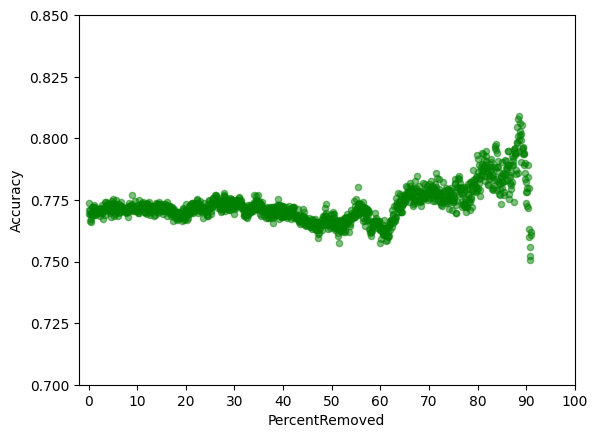

In [ ]:
ds_model_srt1.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()

# Decision Tree

## Decision Tree optfl='N'

In [ ]:
ds_model_dtn = read_output_files(out_path)
ds_model_dtn_srt = ds_model_dtn.sort_values(by='PercentRemoved')
ds_model_dtn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.756029,0.00
1,2,0.759925,0.07
2,2,0.759331,0.14
3,2,0.758552,0.21
4,2,0.756281,0.28
...,...,...,...
1296,2,0.724409,90.72
1297,2,0.721088,90.79
1298,2,0.728311,90.86
1299,2,0.739931,90.93


In [ ]:
hg_acc_dt = ds_model_dtn_srt['Accuracy'].max()
lw_acc_dt = ds_model_dtn_srt['Accuracy'].min()
base_acc_dt = ds_model_dtn_srt['Accuracy'].iloc[0]


acc_hl_dt = hg_acc_dt - lw_acc_dt
acc_hb_dt = hg_acc_dt - base_acc_dt
acc_lb_dt = lw_acc_dt - base_acc_dt

print("Difference between highest and lowest accuracy:", acc_hl_dt)
print("Difference between highest and base accuracy:", acc_hb_dt)
print("Difference between lowest and base accuracy:", acc_lb_dt)

dtkeyval = {
    'high_acc': [hg_acc_dt],
    'low_acc': [lw_acc_dt],
    'base_acc': [base_acc_dt],
    'diff_high_low': [acc_hl_dt],
    'diff_high_base': [acc_hb_dt],
    'diff_low_base': [acc_lb_dt]
}

dataf_dt = pd.DataFrame(dtkeyval)
dataf_dt

Difference between highest and lowest accuracy: 0.05935436905389457
Difference between highest and base accuracy: 0.024413991399544366
Difference between lowest and base accuracy: -0.03494037765435021


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.780443,0.721088,0.756029,0.059354,0.024414,-0.03494


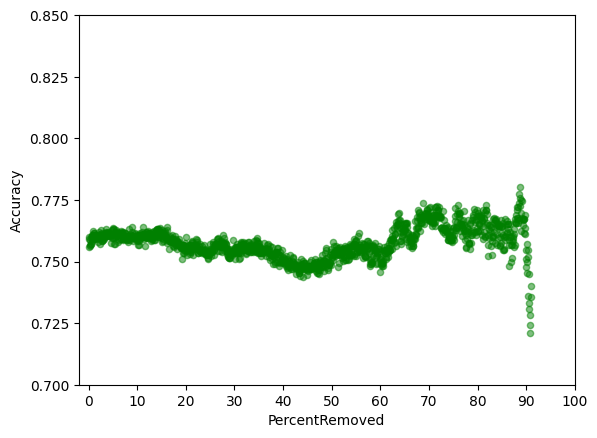

In [ ]:
ds_model_dtn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()

## Decision Tree optfl='Y'

In [ ]:
ds_model_dty = read_output_files(out_path)
ds_model_dty_srt = ds_model_dty.sort_values(by='PercentRemoved')
ds_model_dty_srt

,model__class_weight,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,Accuracy,PercentRemoved
24,balanced,10,sqrt,25,30,0.756029,0.00
25,balanced,10,sqrt,8,85,0.751463,0.07
26,balanced,10,sqrt,21,30,0.755463,0.14
27,balanced,10,sqrt,15,70,0.747986,0.21
28,balanced,10,sqrt,15,70,0.748220,0.28
...,...,...,...,...,...,...,...
19,balanced,10,sqrt,21,30,0.716535,90.72
20,balanced,10,sqrt,8,70,0.732426,90.79
21,balanced,10,sqrt,8,70,0.740868,90.86
22,balanced,10,sqrt,25,70,0.736479,90.93


In [ ]:
hg_acc_dty = ds_model_dty_srt['Accuracy'].max()
lw_acc_dty = ds_model_dty_srt['Accuracy'].min()
base_acc_dty = ds_model_dty_srt['Accuracy'].iloc[0]


acc_hl_dty = hg_acc_dty - lw_acc_dty
acc_hb_dty = hg_acc_dty - base_acc_dty
acc_lb_dty = lw_acc_dty - base_acc_dty

print("Difference between highest and lowest accuracy:", acc_hl_dty)
print("Difference between highest and base accuracy:", acc_hb_dty)
print("Difference between lowest and base accuracy:", acc_lb_dty)

dtykeyval = {
    'high_acc': [hg_acc_dty],
    'low_acc': [lw_acc_dty],
    'base_acc': [base_acc_dty],
    'diff_high_low': [acc_hl_dty],
    'diff_high_base': [acc_hb_dty],
    'diff_low_base': [acc_lb_dty]
}

dataf_dty = pd.DataFrame(dtykeyval)
dataf_dty

Difference between highest and lowest accuracy: 0.07374103601618531
Difference between highest and base accuracy: 0.010943664035720335
Difference between lowest and base accuracy: -0.06279737198046498


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.766972,0.693231,0.756029,0.073741,0.010944,-0.062797


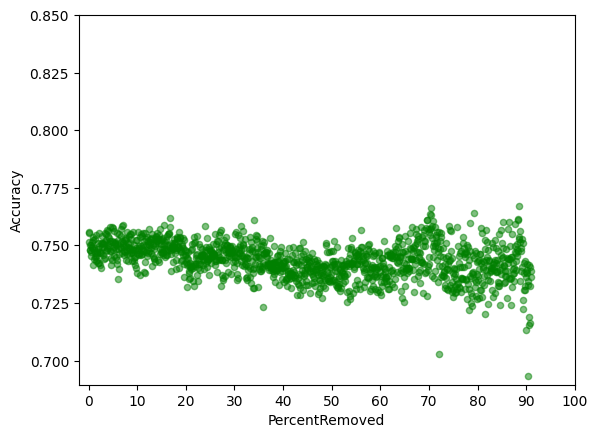

In [ ]:
ds_model_dty_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()

# Bagging

## Bagging optfl='N'

In [ ]:
ds_model_bgn = read_output_files(out_path)
ds_model__bgn_srt = ds_model_bgn.sort_values(by='PercentRemoved')
ds_model__bgn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.740892,0.00
1,2,0.742791,0.07
2,2,0.744903,0.14
3,2,0.744115,0.21
4,2,0.739845,0.28
...,...,...,...
1296,2,0.728909,90.72
1297,2,0.735828,90.79
1298,2,0.736301,90.86
1299,2,0.738780,90.93


In [ ]:
hg_acc_bg = ds_model__bgn_srt['Accuracy'].max()
lw_acc_bg = ds_model__bgn_srt['Accuracy'].min()
base_acc_bg = ds_model__bgn_srt['Accuracy'].iloc[0]


acc_hl_bg = hg_acc_bg - lw_acc_bg
acc_hb_bg = hg_acc_bg - base_acc_bg
acc_lb_bg = lw_acc_bg - base_acc_bg

print("Difference between highest and lowest accuracy:", acc_hl_bg)
print("Difference between highest and base accuracy:", acc_hb_bg)
print("Difference between lowest and base accuracy:", acc_lb_bg)

bgkeyval = {
    'high_acc': [hg_acc_bg],
    'low_acc': [lw_acc_bg],
    'base_acc': [base_acc_bg],
    'diff_high_low': [acc_hl_bg],
    'diff_high_base': [acc_hb_bg],
    'diff_low_base': [acc_lb_bg]
}

dataf_bg = pd.DataFrame(bgkeyval)
dataf_bg

Difference between highest and lowest accuracy: 0.044526102822696645
Difference between highest and base accuracy: 0.027085455890497157
Difference between lowest and base accuracy: -0.01744064693219949


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.767977,0.723451,0.740892,0.044526,0.027085,-0.017441


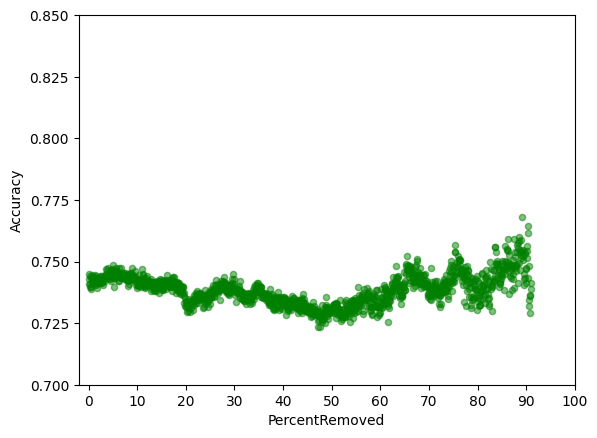

In [ ]:
ds_model__bgn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()

# Random Forest

## Random Forest optfl='N'

In [ ]:
ds_model_rfn = read_output_files(out_path)
ds_model_rfn_srt = ds_model_rfn.sort_values(by='PercentRemoved')
ds_model_rfn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.763128,0.00
1,2,0.765566,0.07
2,2,0.767067,0.14
3,2,0.765875,0.21
4,2,0.762249,0.28
...,...,...,...
1296,2,0.758155,90.72
1297,2,0.758503,90.79
1298,2,0.768265,90.86
1299,2,0.762946,90.93


In [ ]:
hg_acc_rf = ds_model_rfn_srt['Accuracy'].max()
lw_acc_rf = ds_model_rfn_srt['Accuracy'].min()
base_acc_rf = ds_model_rfn_srt['Accuracy'].iloc[0]


acc_hl_rf = hg_acc_rf - lw_acc_rf
acc_hb_rf = hg_acc_rf - base_acc_rf
acc_lb_rf = lw_acc_rf - base_acc_rf

print("Difference between highest and lowest accuracy:", acc_hl_rf)
print("Difference between highest and base accuracy:", acc_hb_rf)
print("Difference between lowest and base accuracy:", acc_lb_rf)

rfkeyval = {
    'high_acc': [hg_acc_rf],
    'low_acc': [lw_acc_rf],
    'base_acc': [base_acc_rf],
    'diff_high_low': [acc_hl_rf],
    'diff_high_base': [acc_hb_rf],
    'diff_low_base': [acc_lb_rf]
}

dataf_rf = pd.DataFrame(rfkeyval)
dataf_rf

Difference between highest and lowest accuracy: 0.0395662165133952
Difference between highest and base accuracy: 0.03361249745643469
Difference between lowest and base accuracy: -0.005953719056960516


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.79674,0.757174,0.763128,0.039566,0.033612,-0.005954


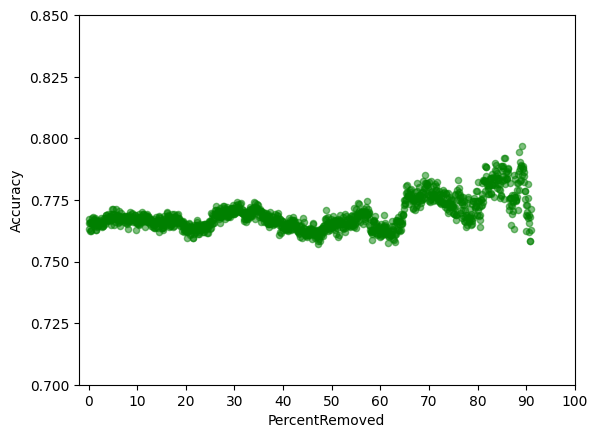

In [ ]:
ds_model_rfn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()

# CatBoost

## CatBoost optfl='N'

In [ ]:
ds_model_ctb = read_output_files(out_path)
ds_model_ctb_srt = ds_model_ctb.sort_values(by='PercentRemoved')
ds_model_ctb_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.771897,0.00
1,2,0.809549,0.07
2,2,0.807946,0.14
3,2,0.808767,0.21
4,2,0.804858,0.28
...,...,...,...
1296,2,0.803150,90.72
1297,2,0.797052,90.79
1298,2,0.809361,90.86
1299,2,0.806674,90.93


In [ ]:
hg_acc_cb = ds_model_ctb_srt['Accuracy'].max()
lw_acc_cb = ds_model_ctb_srt['Accuracy'].min()
base_acc_cb = ds_model_ctb_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_cb = pd.DataFrame(cbkeyval)
dataf_cb

Difference between highest and lowest accuracy: 0.07182318064133775
Difference between highest and base accuracy: 0.07182318064133775
Difference between lowest and base accuracy: 0.0


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.84372,0.771897,0.771897,0.071823,0.071823,0.0


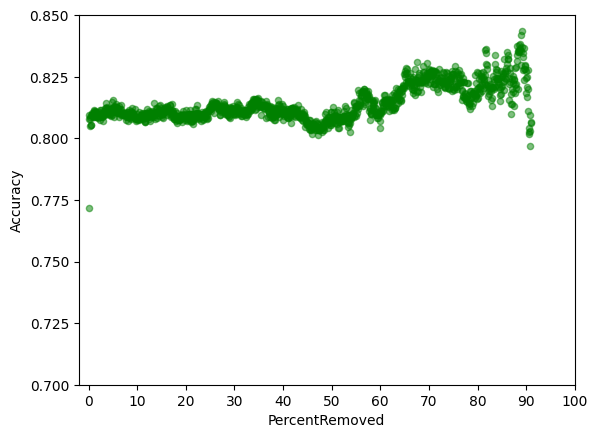

In [ ]:
ds_model_ctb_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
plt.show()